### Banking Dataset Prediction Using Logisitic regression

In [53]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [27]:
#reading the dataset
data = pd.read_csv('bank.csv')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [33]:
#Changing target values to binary
data.deposit.replace('yes', 1, inplace=True)
data.deposit.replace('no', 0, inplace=True)

<AxesSubplot:>

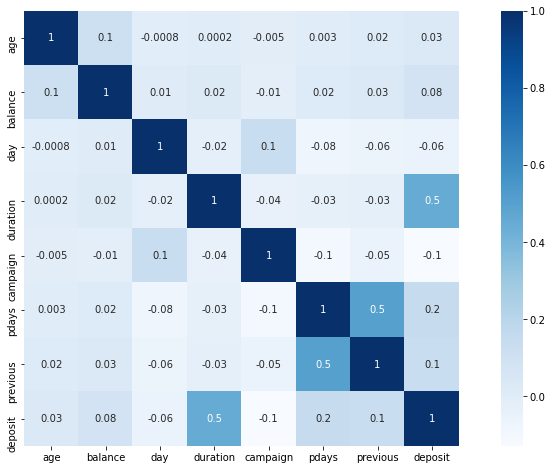

In [35]:
#correlation between the features
plt.figure(figsize=(15, 8))
sns.heatmap(data.corr(), annot= True,square = True, cmap = 'Blues', fmt = ".0g")

In [36]:
#Check Null Values 
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [37]:
#Removing the unnecessary columns from the dataset
data.drop(['age'], axis = 1, inplace=True)

In [38]:
#Encoding the dataset
data = pd.get_dummies(data)

In [39]:
#Splitting the dependent and independent features
X = data.drop('deposit', axis = 1)
y = data.deposit

In [40]:
#Splitting the model into test and train dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 101)


In [46]:
#Model creation
model = LogisticRegression(random_state=101)

In [47]:
params = {'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
         'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
          'multi_class' : ['auto', 'ovr', 'multinomial']
         }
rsv = RandomizedSearchCV(model, param_distributions=params, cv = 10, n_jobs=-1 )
rsv.fit(X_train, y_train)
rsv.best_params_

{'solver': 'liblinear', 'penalty': 'l1', 'multi_class': 'ovr'}

In [48]:
model.set_params(solver = 'liblinear', penalty = 'l1', multi_class='ovr')

LogisticRegression(multi_class='ovr', penalty='l1', random_state=101,
                   solver='liblinear')

In [49]:
#Fitting the model
model.fit(X_train, y_train)

LogisticRegression(multi_class='ovr', penalty='l1', random_state=101,
                   solver='liblinear')

In [50]:
#Predicting the values
y_pred = model.predict(X_test)

In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1181
           1       0.83      0.80      0.81      1052

    accuracy                           0.83      2233
   macro avg       0.83      0.83      0.83      2233
weighted avg       0.83      0.83      0.83      2233



In [54]:
#Accuracy of model
accuracy_score(y_test, y_pred)

0.8293775190326914